# 🐍 **Introducción a Python para el Análisis de Datos**<br>

### 👨‍💻 Jorge Gómez Galván
* LinkedIn: [linkedin.com/in/jorgeggalvan/](https://www.linkedin.com/in/jorgeggalvan/) 
* E-mail: gomezgalvanjorge@gmail.com

## **Capítulo 4: Limpieza de Datos - Soluciones a Ejercicios**
---

Este notebook incluye las soluciones a los ejercicios del [capítulo 4: Limpieza de Datos](https://github.com/jorgeggalvan/Data-Analysis-Fundamentals-with-Python/blob/main/Python_Data_Analysis_4.1_Cleaning.ipynb) de la Introducción a Python para el Análisis de Datos.

### 4 - Ejercicios resueltos

#### Ejercicio 4.1
---

> Dataset a utilizar: `fortune_1000.csv`

**4.1A:** Identifica las columnas con valores nulos en el DataFrame.

**4.1B:** Calcula la cantidad de empresas con al menos un valor nulo en alguna de las columnas del DataFrame.

**4.1C:** Elimina las filas que contienen valores nulos en la columna 'Profits'.

##### Ejercicio 4.1A

In [1]:
# Importamos Pandas
import pandas as pd

In [2]:
# Importamos el DataFrame de empresas estadounidenses
df_fortune = pd.read_csv('./data/fortune_1000.csv')
df_fortune.head()

,Rank,Company,Sector,Industry,Location,Employees,Revenue,Profits,Change in Rank
0,1,Walmart,Retailing,General Merchandisers,"Bentonville, AR",2100000,648125.0,15511.0,0.0
1,2,Amazon,Retailing,Internet Services and Retailing,"Seattle, WA",1525000,574785.0,30425.0,0.0
2,3,Apple,Technology,"Computers, Office Equipment","Cupertino, CA",161000,383285.0,96995.0,1.0
3,4,UnitedHealth Group,Health Care,Health Care: Insurance and Managed Care,"Minnetonka, MN",440000,371622.0,22381.0,1.0
4,5,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",396500,364482.0,96223.0,2.0


In [3]:
# Verificamos si hay valores nulos en cada columna del DataFrame
df_fortune.isna().any()

Rank              False
Company           False
Sector            False
Industry          False
Location          False
Employees         False
Revenue           False
Profits            True
Change in Rank    False
dtype: bool

##### Ejercicio 4.1B

In [4]:
# Calculamos la cantidad de nulos en 'Profits', la columna con valores nulos
df_fortune['Profits'].isna().sum()

2

##### Ejercicio 4.1C

In [5]:
# Eliminamos los dos valores nulos
df_fortune = df_fortune.dropna()

# Obtenemos el número total de filas para comprobar que se han eliminado los nulos
len(df_fortune)

998

#### Ejercicio 4.2
---

> Dataset a utilizar: `european_countries_long.csv`

**4.2A:** Identifica y muestra las filas con valores nulos en cualquiera de las columnas del DataFrame.

**4.2B:** Completa los valores nulos identificados, reemplazándolos con el siguiente valor no nulo de la misma columna.

##### Ejercicio 4.2A

In [6]:
# Importamos el DataFrame de países europeos
df_eu_countries = pd.read_csv('./data/european_countries_long.csv')
df_eu_countries

,Country,Year,Indicator,Value
0,Albania,1990,Population,3286542.00
1,Albania,2000,Population,3089027.00
2,Albania,2010,Population,2913021.00
3,Albania,2020,Population,2837849.00
4,Albania,1990,Life Expectancy,73.14
...,...,...,...,...
571,United Kingdom,2020,Life Expectancy,80.35
572,United Kingdom,1990,GDP,10931693.89
573,United Kingdom,2000,GDP,16655348.77
574,United Kingdom,2010,GDP,24854825.96


In [7]:
# Creamos una condición para filtrar las filas con al menos un nulo en cualquiera de sus columnas
cond = df_eu_countries['Value'].isna()

# Mostramos las filas con al menos un nulo
df_eu_countries[cond]

,Country,Year,Indicator,Value
16,Andorra,1990,Life Expectancy,NaN
17,Andorra,2000,Life Expectancy,NaN
18,Andorra,2010,Life Expectancy,NaN
68,Belarus,1990,GDP,NaN
164,Estonia,1990,GDP,NaN
284,Latvia,1990,GDP,NaN
292,Liechtenstein,1990,Life Expectancy,NaN
308,Lithuania,1990,GDP,NaN
352,Monaco,1990,Life Expectancy,NaN
353,Monaco,2000,Life Expectancy,NaN


##### Ejercicio 4.2B

In [8]:
# Rellenamos los valores nulos con el siguiente valor no nulo hacia abajo
df_eu_countries = df_eu_countries.bfill()

#### Ejercicio 4.3
---

> Dataset a utilizar: `imdb_movies.csv`

**4.3A:** Elimina las películas con títulos duplicados ('movie_title'), manteniendo la última aparición de cada título, ya que representa el registro más actualizado.

**4.3B:** Calcula y muestra la cantidad de valores nulos presentes en cada columna del DataFrame.

**4.3C:** Reemplaza los valores nulos de la columna 'duration' por la duración media de las películas.

**4.3D:** Reemplaza los valores nulos de las columnas 'gross' y 'budget' por la etiqueta 'Unknown'.

##### Ejercicio 4.3A

In [9]:
# Importamos el DataFrame de películas
df_movies = pd.read_csv('./data/imdb_movies.csv')
df_movies.head()

,movie_title,title_year,duration,country,language,genres,content_rating,color,aspect_ratio,gross,...,num_critic_for_reviews,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,plot_keywords,movie_imdb_link
0,Avatar,2009.0,178.0,USA,English,Action|Adventure|Fantasy|Sci-Fi,PG-13,Color,1.78,760505847.0,...,723.0,33000,0.0,1000.0,936.0,855.0,4834,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,2007.0,169.0,USA,English,Action|Adventure|Fantasy,PG-13,Color,2.35,309404152.0,...,302.0,0,563.0,40000.0,5000.0,1000.0,48350,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,2015.0,148.0,UK,English,Action|Adventure|Thriller,PG-13,Color,2.35,200074175.0,...,602.0,85000,0.0,11000.0,393.0,161.0,11700,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,2012.0,164.0,USA,English,Action|Thriller,PG-13,Color,2.35,448130642.0,...,813.0,164000,22000.0,27000.0,23000.0,23000.0,106759,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,Documentary,NaN,NaN,NaN,NaN,...,NaN,0,131.0,131.0,12.0,NaN,143,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...


In [10]:
# Eliminamos las filas con los títulos duplicados, conservando sólo la última aparición
df_movies = df_movies.drop_duplicates(subset=['movie_title'], keep='last')

# Obtenemos el número de filas tras la eliminación de los duplicados
len(df_movies)

4917

##### Ejercicio 4.3B

In [11]:
# Calculamos el número de valores nulos en cada columna
df_movies.isna().sum()

movie_title                    0
title_year                   106
duration                      15
country                        5
language                      14
genres                         0
content_rating               301
color                         19
aspect_ratio                 326
gross                        862
budget                       484
director_name                102
actor_1_name                   7
actor_2_name                  13
actor_3_name                  23
imdb_score                     0
num_voted_users                0
num_user_for_reviews          21
num_critic_for_reviews        49
movie_facebook_likes           0
director_facebook_likes      102
actor_1_facebook_likes         7
actor_2_facebook_likes        13
actor_3_facebook_likes        23
cast_total_facebook_likes      0
facenumber_in_poster          13
plot_keywords                151
movie_imdb_link                0
dtype: int64

##### Ejercicio 4.3C

In [12]:
# Calculamos la duración media de las películas
avg_duration = df_movies['duration'].mean()

# Reemplazamos los nulos en 'duración' por la media calculada
df_movies['duration'] = df_movies['duration'].fillna(avg_duration)
df_movies['duration']

0       178.000000
1       169.000000
2       148.000000
3       164.000000
4       107.088127
           ...    
5038     87.000000
5039     43.000000
5040     76.000000
5041    100.000000
5042     90.000000
Name: duration, Length: 4917, dtype: float64

In [13]:
# Comprobamos que ya no hay valores nulos en la columna 'duration'
df_movies['duration'].isna().sum()

0

##### Ejercicio 4.3D

In [14]:
# Reemplazamos los nulos en 'gross' y 'budget' por el valor 'Unknown'
df_movies[['gross','budget']] = df_movies[['gross','budget']].fillna('Unknown')
df_movies[['gross','budget']]

,gross,budget
0,760505847.0,237000000.0
1,309404152.0,300000000.0
2,200074175.0,245000000.0
3,448130642.0,250000000.0
4,Unknown,Unknown
...,...,...
5038,Unknown,Unknown
5039,Unknown,Unknown
5040,Unknown,1400.0
5041,10443.0,Unknown


In [15]:
# Comprobamos que ya no hay valores nulos en 'gross' y 'budget'
df_movies[['gross','budget']].isna().sum()

gross     0
budget    0
dtype: int64

#### Ejercicio 4.4
---

> Dataset a utilizar: `amzn_stock.csv`

**4.4A:** Identifica los outliers del campo 'Volume' utilizando el método de z-score, considerando outliers aquellos valores con z-score superior a 3.

**4.4B:** Identifica los outliers del campo 'Volume' utilizando el rango intercuartílico (IQR).

##### Ejercicio 4.4A

In [16]:
# Importamos el DataFrame con las cotizaciones de Amazon
df_amzn = pd.read_csv('./data/amzn_stock.csv')
df_amzn.head()

,Date,Open,High,Low,Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,377064000


In [17]:
# Importamos el módulo 'stats' de la librería Scipy
from scipy import stats

In [18]:
# Calculamos el z-score de 'Volume'
df_amzn['Volume Z-Score'] = stats.zscore(df_amzn['Volume'], nan_policy='omit').round(2)

In [19]:
# Creamos una condición para identificar los outliers (aquellos con un z-score mayor a 3)
cond = df_amzn['Volume Z-Score'] > 3

# Filtramos el DataFrame para seleccionar únicamente los outliers, ordenando por el z-score
df_amzn[cond].sort_values('Volume Z-Score', ascending=False)

,Date,Open,High,Low,Close,Volume,Volume Z-Score
2500,2007-04-25,2.656000,2.859000,2.647500,2.840500,2086584000,14.23
401,1998-12-16,2.159375,2.514583,2.158333,2.408333,2035944000,13.86
386,1998-11-24,1.866667,1.942708,1.708333,1.787500,1633512000,10.92
598,1999-09-29,3.325000,4.250000,3.287500,4.037500,1587488000,10.59
2313,2006-07-26,1.438000,1.450000,1.298000,1.313000,1539704000,10.24
...,...,...,...,...,...,...,...
298,1998-07-22,1.116667,1.165625,1.087500,1.116667,559488000,3.09
299,1998-07-23,1.083333,1.154167,1.058333,1.063542,556212000,3.07
805,2000-07-25,1.837500,1.937500,1.662500,1.881250,555050000,3.06
496,1999-05-05,3.596875,3.706250,3.346875,3.662500,554196000,3.05


##### Ejercicio 4.4B

In [20]:
# Calculamos el primer cuartil (Q3) y el tercer cuartil (Q3) de 'Volume'
Q1 = df_amzn['Volume'].quantile(0.25)
Q3 = df_amzn['Volume'].quantile(0.75)

# Calculamos el rango intercuartílico
IQR = Q3 - Q1

# Calculamos los límites intercuartílicos (inferior y superior)
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [21]:
# Creamos las condiciones para identificar los outliers por los límites intercuartílicos
cond_lower = df_amzn['Volume'] >= lower_limit
cond_upper = df_amzn['Volume'] <= upper_limit

# Filtramos el DataFrame para seleccionar únicamente los outliers
df_amzn[-(cond_lower & cond_upper)].sort_values('Volume', ascending=False)

,Date,Open,High,Low,Close,Volume,Volume Z-Score
2500,2007-04-25,2.656000,2.859000,2.647500,2.840500,2086584000,14.23
401,1998-12-16,2.159375,2.514583,2.158333,2.408333,2035944000,13.86
386,1998-11-24,1.866667,1.942708,1.708333,1.787500,1633512000,10.92
598,1999-09-29,3.325000,4.250000,3.287500,4.037500,1587488000,10.59
2313,2006-07-26,1.438000,1.450000,1.298000,1.313000,1539704000,10.24
...,...,...,...,...,...,...,...
669,2000-01-10,3.628125,3.631250,3.278125,3.459375,295158000,1.17
1183,2002-01-30,0.699000,0.712500,0.660000,0.695000,295036000,1.17
373,1998-11-05,1.064063,1.084375,1.052083,1.070833,294648000,1.16
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,294000000,1.16


In [22]:
# Importamos Matplotlib
import matplotlib.pyplot as plt

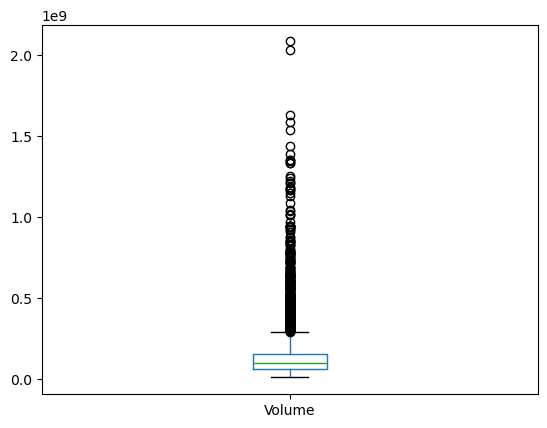

In [23]:
# Creamos un boxplot para 'Volume'
df_amzn.boxplot(column='Volume', grid=False)
plt.show() # Utilizamos 'plt.show()' para desplegar el gráfico

#### Ejercicio 4.5
---

> Dataset a utilizar: `world_countries.csv`

Crea un boxplot (o diagrama de caja) para visualizar la distribución de la esperanza de vida al nacer, agrupando la información entre países por continente.

In [24]:
# Importamos el DataFrame de países
df_countries = pd.read_csv('./data/world_countries.csv')
df_countries.head()

,Country,Continent,Population,Life Expectancy,GDP (Millions)
0,Afghanistan,Asia,42239854,62.879,14502.16
1,Albania,Europe,2745972,76.833,22977.68
2,Algeria,Africa,45606480,77.129,239899.49
3,Andorra,Europe,80088,NaN,3727.67
4,Angola,Africa,36684202,61.929,84722.96


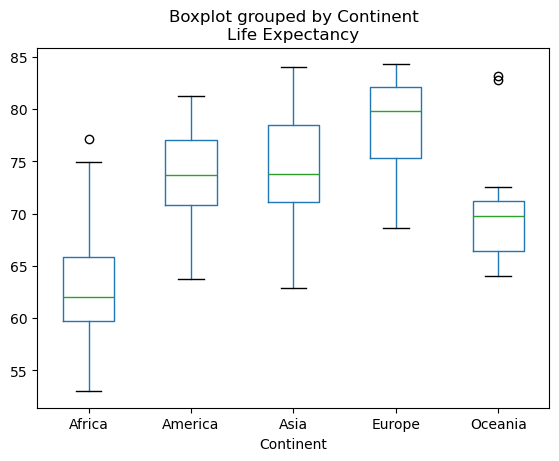

In [25]:
# Creamos un boxplot para la columna 'Life Expectancy' agrupando por 'Continent'
df_countries.boxplot(column='Life Expectancy', by='Continent', grid=False)
plt.show() # Utilizamos 'plt.show()' para desplegar el gráfico

#### Ejercicio 4.6
---

> Dataset a utilizar: `amazon_products.csv`

**4.6A:** Limpia las categorías de productos, diviendo la columna 'Categories' hasta extraer las 4 primeras para cada producto.

**4.6B:** Calcula la puntuación promedio de las reseñas ('Reviews Rating') agrupadas por la categoría principal y la primera subcategoría.

##### Ejercicio 4.6A

In [26]:
# Importamos el DataFrame de productos de Amazon
df_products = pd.read_csv('./data/amazon_products.csv')
df_products.head()

,ASINs,Name,Brand,Categories,Reviews Rating
0,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,Microsoft,"Electronics,Computers,Computer Accessories,Key...",5.0
1,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,Microsoft,"Electronics,Computers,Computer Accessories,Key...",4.0
2,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,Microsoft,"Electronics,Computers,Computer Accessories,Key...",4.0
3,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,Microsoft,"Electronics,Computers,Computer Accessories,Key...",5.0
4,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,Microsoft,"Electronics,Computers,Computer Accessories,Key...",5.0


In [27]:
# Dividimos la columna 'Categories', limitando la división a un máximo de 3 divisiones (4 columnas)
df_categories = df_products['Categories'].str.split(pat=',', expand=True, n=3)
df_categories

,0,1,2,3
0,Electronics,Computers,Computer Accessories,"Keyboards, Mice & Joysticks,Keyboards,All Keyb..."
1,Electronics,Computers,Computer Accessories,"Keyboards, Mice & Joysticks,Keyboards,All Keyb..."
2,Electronics,Computers,Computer Accessories,"Keyboards, Mice & Joysticks,Keyboards,All Keyb..."
3,Electronics,Computers,Computer Accessories,"Keyboards, Mice & Joysticks,Keyboards,All Keyb..."
4,Electronics,Computers,Computer Accessories,"Keyboards, Mice & Joysticks,Keyboards,All Keyb..."
...,...,...,...,...
7294,Electronics,Accessories & Supplies,Audio & Video Accessories,"Remote Controls & Accessories,TV & Video,TV Ac..."
7295,Office,Projectors & Presentation Equipment,Audio Visual Presentation,"TV Stands, Mounts & Furniture,Projector Mounts..."
7296,Office,Projectors & Presentation Equipment,Audio Visual Presentation,"TV Stands, Mounts & Furniture,Projector Mounts..."
7297,Office,Projectors & Presentation Equipment,Audio Visual Presentation,"TV Stands, Mounts & Furniture,Projector Mounts..."


In [28]:
# Unimos el DataFrame creado con el original
df_products_splited = df_categories.join(df_products)

# Renombramos las columnas creadas para mayor claridad y ordenamos las columnas
df_products_splited = df_products_splited.rename(columns={0:'Category', 1:'Subcategory 1', 2:'Subcategory 2', 3:'Subcategory 3'})
df_products_splited = df_products_splited.loc[:, ['ASINs','Name','Brand','Category','Subcategory 1','Subcategory 2','Subcategory 3','Reviews Rating']]
df_products_splited

,ASINs,Name,Brand,Category,Subcategory 1,Subcategory 2,Subcategory 3,Reviews Rating
0,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,Microsoft,Electronics,Computers,Computer Accessories,"Keyboards, Mice & Joysticks,Keyboards,All Keyb...",5.0
1,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,Microsoft,Electronics,Computers,Computer Accessories,"Keyboards, Mice & Joysticks,Keyboards,All Keyb...",4.0
2,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,Microsoft,Electronics,Computers,Computer Accessories,"Keyboards, Mice & Joysticks,Keyboards,All Keyb...",4.0
3,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,Microsoft,Electronics,Computers,Computer Accessories,"Keyboards, Mice & Joysticks,Keyboards,All Keyb...",5.0
4,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,Microsoft,Electronics,Computers,Computer Accessories,"Keyboards, Mice & Joysticks,Keyboards,All Keyb...",5.0
...,...,...,...,...,...,...,...,...
7294,B00IAKLM54,Logitech 915-000224 Harmony Ultimate One 15-D...,Logitech,Electronics,Accessories & Supplies,Audio & Video Accessories,"Remote Controls & Accessories,TV & Video,TV Ac...",4.0
7295,"B005MJHFHK,B00VXW0J5A,B00OY50CZU",Round LCD/Projector Ceiling Plate - Black,Peerless-AV,Office,Projectors & Presentation Equipment,Audio Visual Presentation,"TV Stands, Mounts & Furniture,Projector Mounts...",4.0
7296,"B005MJHFHK,B00VXW0J5A,B00OY50CZU",Round LCD/Projector Ceiling Plate - Black,Peerless-AV,Office,Projectors & Presentation Equipment,Audio Visual Presentation,"TV Stands, Mounts & Furniture,Projector Mounts...",4.0
7297,"B005MJHFHK,B00VXW0J5A,B00OY50CZU",Round LCD/Projector Ceiling Plate - Black,Peerless-AV,Office,Projectors & Presentation Equipment,Audio Visual Presentation,"TV Stands, Mounts & Furniture,Projector Mounts...",5.0


##### Ejercicio 4.6B

In [29]:
# Agrupamos por la categoría principal y la subcategoría 1, y calculamos la media de 'Reviews Rating' para cada grupo
df_products_splited.groupby(['Category', 'Subcategory 1']).agg({'Reviews Rating':'mean'}).round(2)\
    .sort_values(by=['Category', 'Subcategory 1'])

Reviews Rating
Category                      Subcategory 1                                       
Accessories                   Portable Power Banks                            4.55
Audio & Video Accessories     TV Mounts                                       4.46
Auto & Tires                  Auto Electronics                                4.53
Computers                     Desktops Workstations                           4.50
                              Internal Hard Drives                            4.80
                              Memory (RAM)                                    4.80
                              Mice & Mice Pads                                4.85
                              Networking                                      4.44
                              Portable Battery Packs                          3.88
                              Wireless Networking                             4.57
Computers & Tablets           Computer Accessories & Peripherals              4.54
Desktop Memory                Computers/Tablets & Networking                  4.55
Electronics                   Accessories & Supplies                          3.95
                              CD Players & Digital Media Receivers            4.12
                              Cameras & Camcorders                            3.85
                              Car & Vehicle Electronics                       4.76
                              Computers                                       4.64
                              Home Audio & Theater                            4.49
                              Portable Audio                                  4.62
                              Portable Audio & Video                          4.45
Headphones                    Bluetooth Headphones                            4.41
                              Electronics                                     4.77
Home Theater Systems          Portable Audio & Video                          5.00
In-Wall & In-Ceiling Speakers Electronics                                     4.80
Internal Solid State Drives   Computers & Accessories                         4.53
LED & LCD TVs                 All TVs                                         4.40
Mobile                        Headphones                                      4.26
Office                        Office Technology                               4.91
                              Projectors & Presentation Equipment             4.25
Outdoor Speakers              Electronics Features                            4.85
Photography                   Photography Bags Cases                          4.63
Portable Bluetooth Speakers   Audio Docks & Mini Speakers                     4.53
                              Bluetooth & Wireless Speakers                   4.27
                              Stereos                                         4.30
Satellite Radio               Satellite Radios                                4.28
Speaker Separates             Center Channel Speakers                         5.00
Stone Products                Electronics                                     4.26
Surround Speakers             Electronics Features                            4.61
                              TV                                              4.60
TV                             Video & Home Audio                             5.00
TV & Video                    Media Streaming Players                         4.30

#### Ejercicio 4.7
---

> Dataset a utilizar:  `starbucks_beverages.csv`

**4.7A:** Elimina las filas duplicadas del dataset.

**4.7B:** Calcula la cantidad de valores nulos en el campo 'Milk' y reemplaza estos valores con la etiqueta "Without Milk"

**4.7C:** Separa los componentes del campo 'Beverage' en dos columnas nuevas ('Beverage' y 'Toppings'), eliminando los paréntesis para limpiar los datos.

**4.7D:** Crea una nueva columna llamada 'Size (fl oz)' que contenga la capacidad en onzas líquidas correspondientes al tamaño de cada bebida, según las siguientes equivalencias:

- Short (8 fl oz)
- Tall (12 fl oz)
- Grande (16 fl oz)
- Venti (24 fl oz)

##### Ejercicio 4.7A

In [30]:
# Importamos el DataFrame de bebidas de Starbucks
df_starbucks = pd.read_csv('./data/starbucks_beverages.csv')
df_starbucks.head()

,Beverage Category,Beverage,Size,Milk,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (g),Total Carbohydrates (g),Cholesterol (g),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (g)
0,Coffee,Brewed Coffee,Short,NaN,3,0.1,0.0,0.0,0.0,5,0.0,0,0,0.3,0%,0%,0%,0%,0.175
1,Coffee,Brewed Coffee,Short,NaN,3,0.1,0.0,0.0,0.0,5,0.0,0,0,0.3,0%,0%,0%,0%,0.175
2,Coffee,Brewed Coffee,Tall,NaN,4,0.1,0.0,0.0,0.0,10,0.0,0,0,0.5,0%,0%,0%,0%,0.26
3,Coffee,Brewed Coffee,Grande,NaN,5,0.1,0.0,0.0,0.0,10,0.0,0,0,1.0,0%,0%,0%,0%,0.33
4,Coffee,Brewed Coffee,Venti,NaN,5,0.1,0.0,0.0,0.0,10,0.0,0,0,1.0,0%,0%,2%,0%,0.41


In [31]:
# Obtenemos el número de filas del DataFrame
len(df_starbucks)

352

In [32]:
# Eliminamos las filas con valores duplicados
df_starbucks = df_starbucks.drop_duplicates()

# Obtenemos el número de filas para comprobar la eliminación de los duplicados
len(df_starbucks)

265

##### Ejercicio 4.7B

In [33]:
# Calculamos la cantidad de nulos en la columna 'Milk'
df_starbucks['Milk'].isna().sum()

27

In [34]:
# Rellenamos los valores nulos de 'Milk' por el valor 'Without Milk'
df_starbucks['Milk'] = df_starbucks['Milk'].fillna('Without Milk')
df_starbucks['Milk']

0      Without Milk
2      Without Milk
3      Without Milk
4      Without Milk
5       Nonfat Milk
           ...     
346      Whole Milk
347         Soymilk
348     Nonfat Milk
350      Whole Milk
351         Soymilk
Name: Milk, Length: 265, dtype: object

In [35]:
# Comprobamos que los valores nulos se han reemplazado
df_starbucks['Milk'].isna().sum()

0

##### Ejercicio 4.7C

In [36]:
# Dividimos la columna 'Beverage' en dos columnas, utilizando '(' como delimitador
df_starbucks[['Beverage', 'Toppings']] = df_starbucks['Beverage'].str.split(pat='(', expand=True)
df_starbucks[['Beverage', 'Toppings']].tail()

,Beverage,Toppings
346,Green Tea,Without Whipped Cream)
347,Green Tea,Without Whipped Cream)
348,Green Tea,Without Whipped Cream)
350,Green Tea,Without Whipped Cream)
351,Green Tea,Without Whipped Cream)


In [37]:
# Eliminamos el paréntesis de cierre ')' de 'Toppings'
df_starbucks['Toppings'] = df_starbucks['Toppings'].str.replace(')', '', regex=False)
df_starbucks['Toppings'].tail()

346    Without Whipped Cream
347    Without Whipped Cream
348    Without Whipped Cream
350    Without Whipped Cream
351    Without Whipped Cream
Name: Toppings, dtype: object

In [38]:
# Mostramos las columnas relevantes para verificar el resultado
df_starbucks[['Beverage Category', 'Beverage', 'Toppings', 'Size', 'Milk']]

,Beverage Category,Beverage,Toppings,Size,Milk
0,Coffee,Brewed Coffee,None,Short,Without Milk
2,Coffee,Brewed Coffee,None,Tall,Without Milk
3,Coffee,Brewed Coffee,None,Grande,Without Milk
4,Coffee,Brewed Coffee,None,Venti,Without Milk
5,Classic Espresso Drinks,Caffe Latte,None,Short,Nonfat Milk
...,...,...,...,...,...
346,Frappuccino Blended Creme,Green Tea,Without Whipped Cream,Grande,Whole Milk
347,Frappuccino Blended Creme,Green Tea,Without Whipped Cream,Grande,Soymilk
348,Frappuccino Blended Creme,Green Tea,Without Whipped Cream,Venti,Nonfat Milk
350,Frappuccino Blended Creme,Green Tea,Without Whipped Cream,Venti,Whole Milk


##### Ejercicio 4.7D

In [39]:
# Definimos un diccionario que mapea los tamaños de bebida a su capacidad en onzas líquidas
size_to_fl_oz = {'Short': 8, 'Tall': 12, 'Grande': 16, 'Venti': 24}

In [40]:
# Creamos una columna que contiene los valores de 'Size' reemplazados por su equivalente en onzas líquidas
df_starbucks['Size (fl oz)'] = df_starbucks['Size'].replace(size_to_fl_oz)

# Mostramos las primeras filas de las columnas relevantes para verificar el resultado
df_starbucks[['Beverage Category', 'Beverage', 'Size', 'Size (fl oz)']].head(10)

,Beverage Category,Beverage,Size,Size (fl oz)
0,Coffee,Brewed Coffee,Short,8
2,Coffee,Brewed Coffee,Tall,12
3,Coffee,Brewed Coffee,Grande,16
4,Coffee,Brewed Coffee,Venti,24
5,Classic Espresso Drinks,Caffe Latte,Short,8
7,Classic Espresso Drinks,Caffe Latte,Short,8
8,Classic Espresso Drinks,Caffe Latte,Short,8
9,Classic Espresso Drinks,Caffe Latte,Tall,12
11,Classic Espresso Drinks,Caffe Latte,Tall,12
12,Classic Espresso Drinks,Caffe Latte,Tall,12


#### Ejercicio 4.8
---

> Dataset a utilizar:  `imdb_movies.csv`

Obtén el ranking de los 5 géneros cinematográficos que tienen la mayor cantidad de películas en el dataset y calcula su puntuación mediana en IMDb.

In [41]:
# Importamos el DataFrame de películas
df_movies = pd.read_csv('./data/imdb_movies.csv')
df_movies.head()

,movie_title,title_year,duration,country,language,genres,content_rating,color,aspect_ratio,gross,...,num_critic_for_reviews,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,plot_keywords,movie_imdb_link
0,Avatar,2009.0,178.0,USA,English,Action|Adventure|Fantasy|Sci-Fi,PG-13,Color,1.78,760505847.0,...,723.0,33000,0.0,1000.0,936.0,855.0,4834,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,2007.0,169.0,USA,English,Action|Adventure|Fantasy,PG-13,Color,2.35,309404152.0,...,302.0,0,563.0,40000.0,5000.0,1000.0,48350,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,2015.0,148.0,UK,English,Action|Adventure|Thriller,PG-13,Color,2.35,200074175.0,...,602.0,85000,0.0,11000.0,393.0,161.0,11700,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,2012.0,164.0,USA,English,Action|Thriller,PG-13,Color,2.35,448130642.0,...,813.0,164000,22000.0,27000.0,23000.0,23000.0,106759,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,Documentary,NaN,NaN,NaN,NaN,...,NaN,0,131.0,131.0,12.0,NaN,143,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...


In [42]:
# Dividimos la columna de géneros en listas, separando por el carácter '|'
df_movies['genres'] = df_movies['genres'].str.split('|')

# Utilizamos el método '.explode()' para transformar cada género en una fila separada
df_movies = df_movies.explode('genres')
df_movies.head()

,movie_title,title_year,duration,country,language,genres,content_rating,color,aspect_ratio,gross,...,num_critic_for_reviews,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,plot_keywords,movie_imdb_link
0,Avatar,2009.0,178.0,USA,English,Action,PG-13,Color,1.78,760505847.0,...,723.0,33000,0.0,1000.0,936.0,855.0,4834,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
0,Avatar,2009.0,178.0,USA,English,Adventure,PG-13,Color,1.78,760505847.0,...,723.0,33000,0.0,1000.0,936.0,855.0,4834,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
0,Avatar,2009.0,178.0,USA,English,Fantasy,PG-13,Color,1.78,760505847.0,...,723.0,33000,0.0,1000.0,936.0,855.0,4834,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
0,Avatar,2009.0,178.0,USA,English,Sci-Fi,PG-13,Color,1.78,760505847.0,...,723.0,33000,0.0,1000.0,936.0,855.0,4834,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,2007.0,169.0,USA,English,Action,PG-13,Color,2.35,309404152.0,...,302.0,0,563.0,40000.0,5000.0,1000.0,48350,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...


In [43]:
# Agrupamos por géneros y calculamos el número de películas únicas y la puntuación mediana de IMDb
df_movies.groupby('genres').agg({'movie_title':'nunique', 'imdb_score':'median'})\
    .rename(columns={'movie_title':'Total Movies', 'imdb_score':'Median IMDb Score'})\
    .sort_values(by='Total Movies', ascending=False)\
    .head()

,Total Movies,Median IMDb Score
genres,,
Drama,2534,6.9
Comedy,1848,6.3
Thriller,1364,6.4
Action,1113,6.3
Romance,1084,6.5
